簡單測試：<br>
若圖片已存在檔案中：

In [6]:
import pytesseract
from PIL import Image

path = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'

def main():
    pytesseract.pytesseract.tesseract_cmd = path
    img = Image.open(r'E:\GitHub\PyCrawlerMarathon\homework\day032-image\test1.png')
    print(pytesseract.image_to_string(img,lang='eng'))

if __name__=='__main__':
    main()

619121



直接給與網路上的圖片連結：

### IO裡的StringIO & BytesIO
* 圖片、影音為二進制檔案


https://www.liaoxuefeng.com/wiki/1016959663602400/1017609424203904

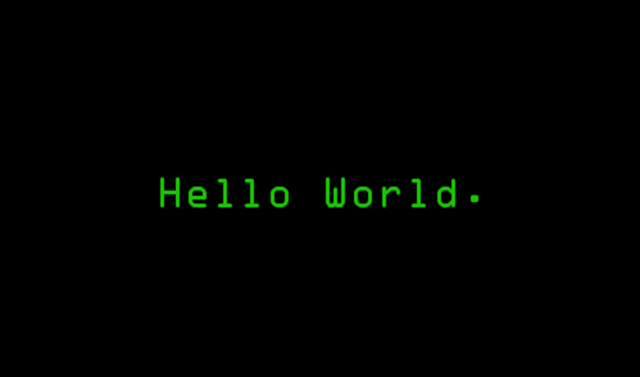

In [3]:
import pytesseract
import requests
from PIL import Image
from io import BytesIO

url = 'https://i0.wp.com/www.embhack.com/wp-content/uploads/2018/06/hello-world.png'
path = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'

res = requests.get(url)
img = Image.open(BytesIO(res.content))

img


In [4]:
print(img)

<PIL.PngImagePlugin.PngImageFile image mode=P size=640x377 at 0x12FBD438>


In [5]:
pytesseract.pytesseract.tesseract_cmd = path
print(pytesseract.image_to_string(img,lang='eng'))

Hello World-



先將圖片存在電腦內再去辨識文字：

In [14]:
import os
import requests
from PIL import Image
import pytesseract
from io import BytesIO

url = 'https://i0.wp.com/www.embhack.com/wp-content/uploads/2018/06/hello-world.png'
path = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'

#先確認存檔路徑
imagepath=r'E:\GitHub\PyCrawlerMarathon\homework\day032-image'
if not os.path.exists(imagepath):
    os.makedirs(imagepath)
    
with requests.get(url) as r:
    r.raise_for_status()
    #image = Image.open(r.raw) 會產生錯誤，cannot identify image file <_io.BytesIO object at 0x0000000007F4DCA8>
    #顯示為BytesIO物件，要用BytesIO開起
    image = Image.open(BytesIO(r.content))
    savename = '{dir}\{id}.{format}'.format(dir=imagepath,id='hello-world1',format='png')
    image.save(savename)

img0 = Image.open(savename)
pytesseract.pytesseract.tesseract_cmd=path
print(pytesseract.image_to_string(img0,lang='eng'))



Hello World-



將電腦內的png檔案轉成jpg
* png元素：RGBA (A：透明度)
* jpg元素：RGB
jpg轉存png OK
png轉存jpg 要先把四道轉為三道

In [26]:
from PIL import Image
imagepath=r'E:\GitHub\PyCrawlerMarathon\homework\day032-image\test01.png'
im = Image.open(imagepath)
#若是jpg轉為png則不需這步
im = im.convert('RGB')
im.save(r'E:\GitHub\PyCrawlerMarathon\homework\day032-image\test01.jpg')
print(im)

<PIL.Image.Image image mode=RGB size=954x362 at 0x130353C8>


### 作業
像 test/test2.png 這種複雜的圖片怎麼辦？

In [7]:
import pytesseract
from PIL import Image

path = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'
test1 = r'E:\GitHub\PyCrawlerMarathon\homework\day032-image\test1.png'
test2 = r'E:\GitHub\PyCrawlerMarathon\homework\day032-image\test2.png'

pytesseract.pytesseract.tesseract_cmd = path
img1 = Image.open(test1)
print(pytesseract.image_to_string(img1))



619121



In [8]:
pytesseract.pytesseract.tesseract_cmd = path
img2 = Image.open(test2)
print(pytesseract.image_to_string(img2))


1413



### 降噪處理
若圖片干擾過大，可先轉為灰階模式(L)做降噪、銳化處理

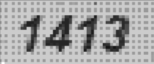

In [2]:
import pytesseract
from PIL import Image
path = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'
test2 = r'E:\GitHub\PyCrawlerMarathon\homework\day032-image\test2.png'

t_img = Image.open(test2).convert('L')
t_img

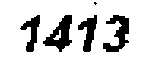

In [11]:
pixels = t_img.load()
#灰階數值從0(黑)～255(白)，先定義一個標準值127.5(中間值，可改)
standard = 127.5
for x in range(t_img.width):
    for y in range(t_img.height):
        if pixels[x,y]>standard:
            pixels[x,y] = 255
        else:
            pixels[x,y] =0
t_img
        

In [12]:
pytesseract.pytesseract.tesseract_cmd = path
print(pytesseract.image_to_string(t_img))

1413

